Shengnan Zhang - assignment 5
Starbucks Locations worldwide
The dataset shows every starbucks store location in the world. 

In [171]:
## import the python modules to use
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Downloads/All_Starbucks_Locations_in_the_World.csv', header = 0)
##import the dataset, panda function read the data


In [172]:
##this data includes every starbucks store location until february 2017.
df

,Store ID,Name,Brand,Store Number,Phone Number,Ownership Type,Street Combined,Street 1,Street 2,Street 3,...,Country Subdivision,Country,Postal Code,Coordinates,Latitude,Longitude,Timezone,Current Timezone Offset,Olson Timezone,First Seen
0,1,Plaza Hollywood,Starbucks,34638-85784,29554570,LS,"Level 2, Plaza Hollywood, Diamond Hill,, Kowloon","Level 2, Plaza Hollywood, Diamond Hill,",Kowloon,NaN,...,91,CN,NaN,"(22.3407001495361, 114.201690673828)",22.340700,114.201691,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
1,6,Exchange Square,Starbucks,34601-20281,21473739,LS,"Shops 308-310, 3/F.,, Exchange Square Podium, ...","Shops 308-310, 3/F.,","Exchange Square Podium, Central, HK.",NaN,...,91,CN,NaN,"(22.2839393615723, 114.158187866211)",22.283939,114.158188,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
2,8,Telford Plaza,Starbucks,34610-28207,27541323,LS,"Shop Unit G1A, Atrium A, Telford Plaza I, , Ko...","Shop Unit G1A, Atrium A, Telford Plaza I",", Kowloon Bay, Kowloon",NaN,...,91,CN,NaN,"(22.3228702545166, 114.213439941406)",22.322870,114.213440,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
3,13,Hong Kong Station,Starbucks,34622-64463,25375216,LS,"Concession HOK 3a & b, LAR Hong Kong Station",Concession HOK 3a & b,LAR Hong Kong Station,NaN,...,91,CN,NaN,"(22.2844505310059, 114.158462524414)",22.284451,114.158463,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
4,17,"Pacific Place, Central",Starbucks,34609-22927,29184762,LS,"Shop 131, Level 1, Pacific Place, 88 Queensway...","Shop 131, Level 1, Pacific Place","88 Queensway, HK",NaN,...,91,CN,NaN,"(22.2776565551758, 114.164619445801)",22.277657,114.164619,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
5,23,Three Garden Road,Starbucks,34616-51681,25091007,LS,"Shop 3, Citibank Plaza,3 Garden Road, Central, HK","Shop 3, Citibank Plaza,3 Garden Road","Central, HK",NaN,...,91,CN,NaN,"(22.2785205841064, 114.160873413086)",22.278521,114.160873,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
6,25,MTR Central,Starbucks,34630-69462,28400565,LS,"Kiosk Nos. CEN K4-K5, Transfer Concourse, , MT...","Kiosk Nos. CEN K4-K5, Transfer Concourse",", MTR Central Station",NaN,...,91,CN,NaN,"(22.2811298370361, 114.159461975098)",22.281130,114.159462,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
7,27,Wan Chai Tower,Starbucks,34615-55880,28240568,LS,"G/F, Wanchai Tower, 12 Harbour Road, Wanchai, HK","G/F, Wanchai Tower, 12 Harbour Road","Wanchai, HK",NaN,...,91,CN,NaN,"(22.2800197601318, 114.17261505127)",22.280020,114.172615,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
8,34,Shun Tak Centre,Starbucks,34634-82422,25496508,LS,"Shop unit 226-227, 2/F, Shun Tak Centre,, Nos....","Shop unit 226-227, 2/F, Shun Tak Centre,",Nos.168-200 Connaught Road Central,NaN,...,91,CN,NaN,"(22.2878608703613, 114.152206420898)",22.287861,114.152206,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM
9,37,Sun Hung Kai Centre,Starbucks,34605-28027,28457367,LS,"Shop G12-13, G/F. Sun Hung Kai Centre, 30 Harb...","Shop G12-13, G/F. Sun Hung Kai Centre","30 Harbour Road, Wanchai",NaN,...,91,CN,NaN,"(22.2805519104004, 114.176803588867)",22.280552,114.176804,China Standard Time,480,GMT+08:00 Asia/Beijing,12/08/2013 10:41:59 PM


how many stores are operating in the world?

In [173]:
df.shape[0]

25150

How many cities have stores around the US?

In [174]:
len(df.Country.unique())

73

top 10 countries have the most number of starbucks

In [175]:
df.Country.value_counts().head(10)

US    13513
CN     2562
CA     1456
JP     1218
KR      959
GB      898
MX      563
TW      390
TR      319
PH      293
Name: Country, dtype: int64

use the bar chart from the panda library to show the top 10 countryies

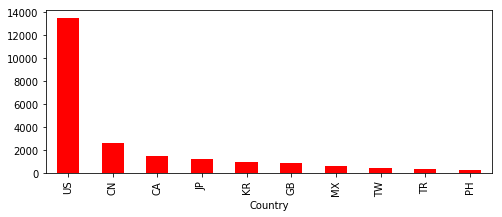

In [176]:
fig = plt.figure(figsize=(8,3))
# change the figure size
ax = fig.add_subplot(111)
df.Country.value_counts().head(10).plot(kind="bar", color="red")
pl.xlabel('Country')

from this chart we can find us and china are the most starbucks store in the world. USA is higher the several time than other countries.

use the bar chart from the panda library to show the last 10 countryies

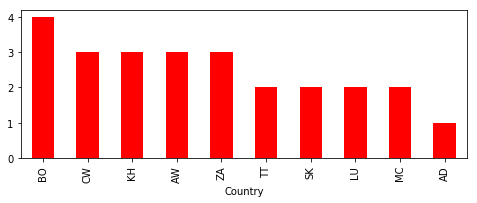

In [177]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(211)
df.Country.value_counts().tail(10).plot(kind="bar", color="red")
pl.xlabel('Country')

there are four ownership type of starbucks such as company owned, licensed, joint venture, franchise.
Who owns the stores? 

In [178]:
df['Ownership Type'].value_counts()

CO    11812
LS     9168
JV     3865
FR      305
Name: Ownership Type, dtype: int64

(-1.1520504321651708,
 1.1548215330404248,
 -1.1540849350538773,
 1.1747554368372137)

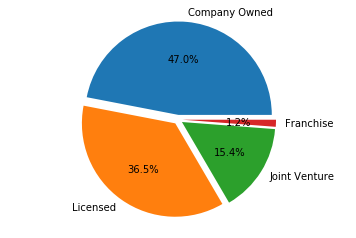

In [179]:
## draw a pie chart to show the percentage of ownership type
labels = 'Company Owned' , 'Licensed', 'Joint Venture', 'Franchise'
sizes = [11812,9168,3865,305]
explode = (0.05,0.05,0.05,0.05)## white space between each slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')

The most popular type of ownership is company owned and licensed.

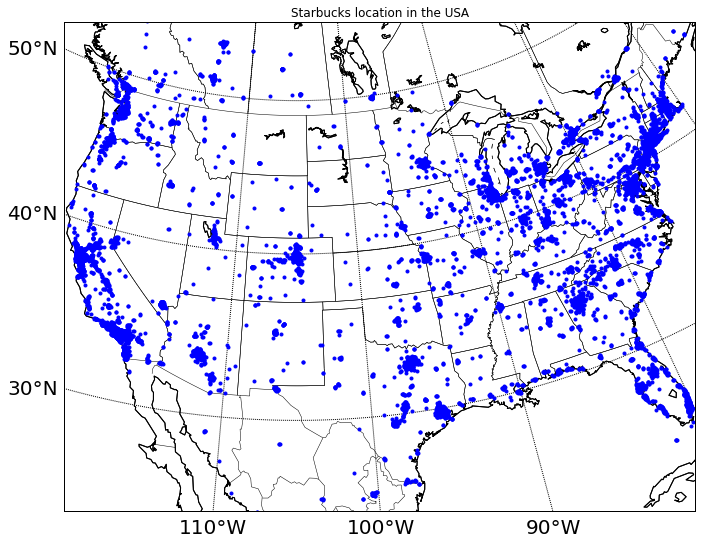

In [180]:
## Show the starbucks store location in the USA using the basemap
plt.figure(figsize=(12,9))
m = Basemap(projection='stere',lat_0=90, lon_0=-105,llcrnrlat = 23.41, urcrnrlat = 45.44, llcrnrlon = -118.67, urcrnrlon = -64.52, resolution ='l')
## draw a usa map 
m.drawcoastlines()
m.drawcountries()
m.drawcoastlines()
m.drawstates()
m.drawmapboundary()
## show the parallels in the map
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=20)

meridians = np.arange(-110.,-60.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=20)

x,y = m(list(df["Longitude"].astype(float)), list(df["Latitude"].astype(float)))

m.plot(x, y, 'bo', markersize = 3)

plt.title("Starbucks location in the USA")
plt.show()

from this figure we can find the west and east of USA are the most popular location for starbucks.

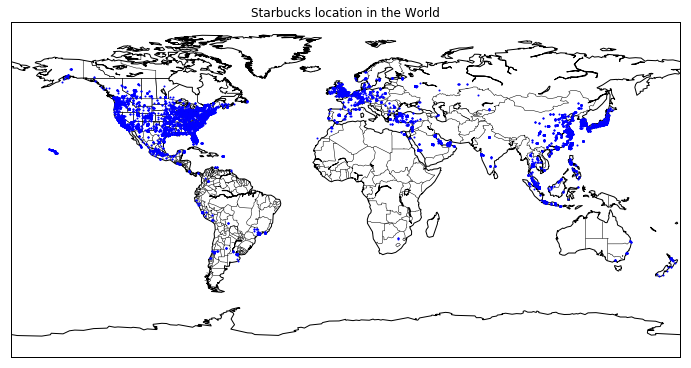

In [181]:
## Show the starbucks store location in the world using the basemap
plt.figure(figsize=(12,9))
m = Basemap()
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary()
x,y = m(list(df["Longitude"].astype(float)), list(df["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 1)


plt.title("Starbucks location in the World")
plt.show()

from this figure we can find the most starbucks stores is in the USA,Europe and China.

how many different country which has starbucks in the world

In [182]:
len(df.Country.unique())

73

In [183]:
df['Country Subdivision'][df.Country == 'US'].value_counts()

CA    2812
TX    1035
WA     755
FL     696
NY     640
IL     566
AZ     485
CO     481
VA     431
OH     372
OR     354
PA     349
NC     334
GA     322
MI     280
MA     271
NJ     259
NV     255
MD     253
IN     221
MO     186
MN     182
TN     178
WI     143
SC     128
CT     121
KY     114
UT      99
HI      97
KS      94
DC      92
IA      89
AL      85
LA      81
OK      78
NM      76
ID      67
NE      58
AR      54
AK      49
MT      35
MS      32
ME      30
NH      28
RI      26
DE      26
SD      25
WV      25
WY      23
ND      13
VT       8
Name: Country Subdivision, dtype: int64

In [184]:
df = pd.read_csv('Downloads/country subdivision.csv', header = 0)
df

,name,Country subdividsion
0,CA,2812
1,TX,1035
2,WA,755
3,FL,696
4,NY,640
5,IL,566
6,AZ,485
7,CO,481
8,VA,431
9,OH,372


In [185]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('Downloads/country subdivision.csv', header = 0)

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['name'],
        z = df['Country subdividsion'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = 'starbucks location in the world)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

I would like to use plotly to draw a United States Choropleth Map which shows how many stores in the every state?
but they said I didn't supply a 'file_id’. I will try my best to work out it.